In [28]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import h5py
from datetime import datetime
import matplotlib as mpl
mpl.rc('figure', figsize=[15.0, 11.0])
import matplotlib.pyplot as plt

import time
import os

%matplotlib inline



In [29]:
# This will show a progress bar on all operations of dask 
from dask.diagnostics import ProgressBar
ProgressBar().register()

# Loading data, easy as pie
If you know **pandas** you'll be right at home.

In [30]:
# Dataframes
train = dd.read_csv('data/train.csv', parse_dates=['date_time'])
test = dd.read_csv('data/test.csv', parse_dates=['date_time'])


### That happened very quick, didn't it?
That's because dask execution is *lazy*, nothing actually happened when you create a *dask.dataframe* instance. It does not go and look up for the data until you do some calculation. What it did was create the structure of the dataframe

In [4]:
test

dd.DataFrame<from-de..., npartitions=9>

In [5]:
test.divisions

(None, None, None, None, None, None, None, None, None, None)

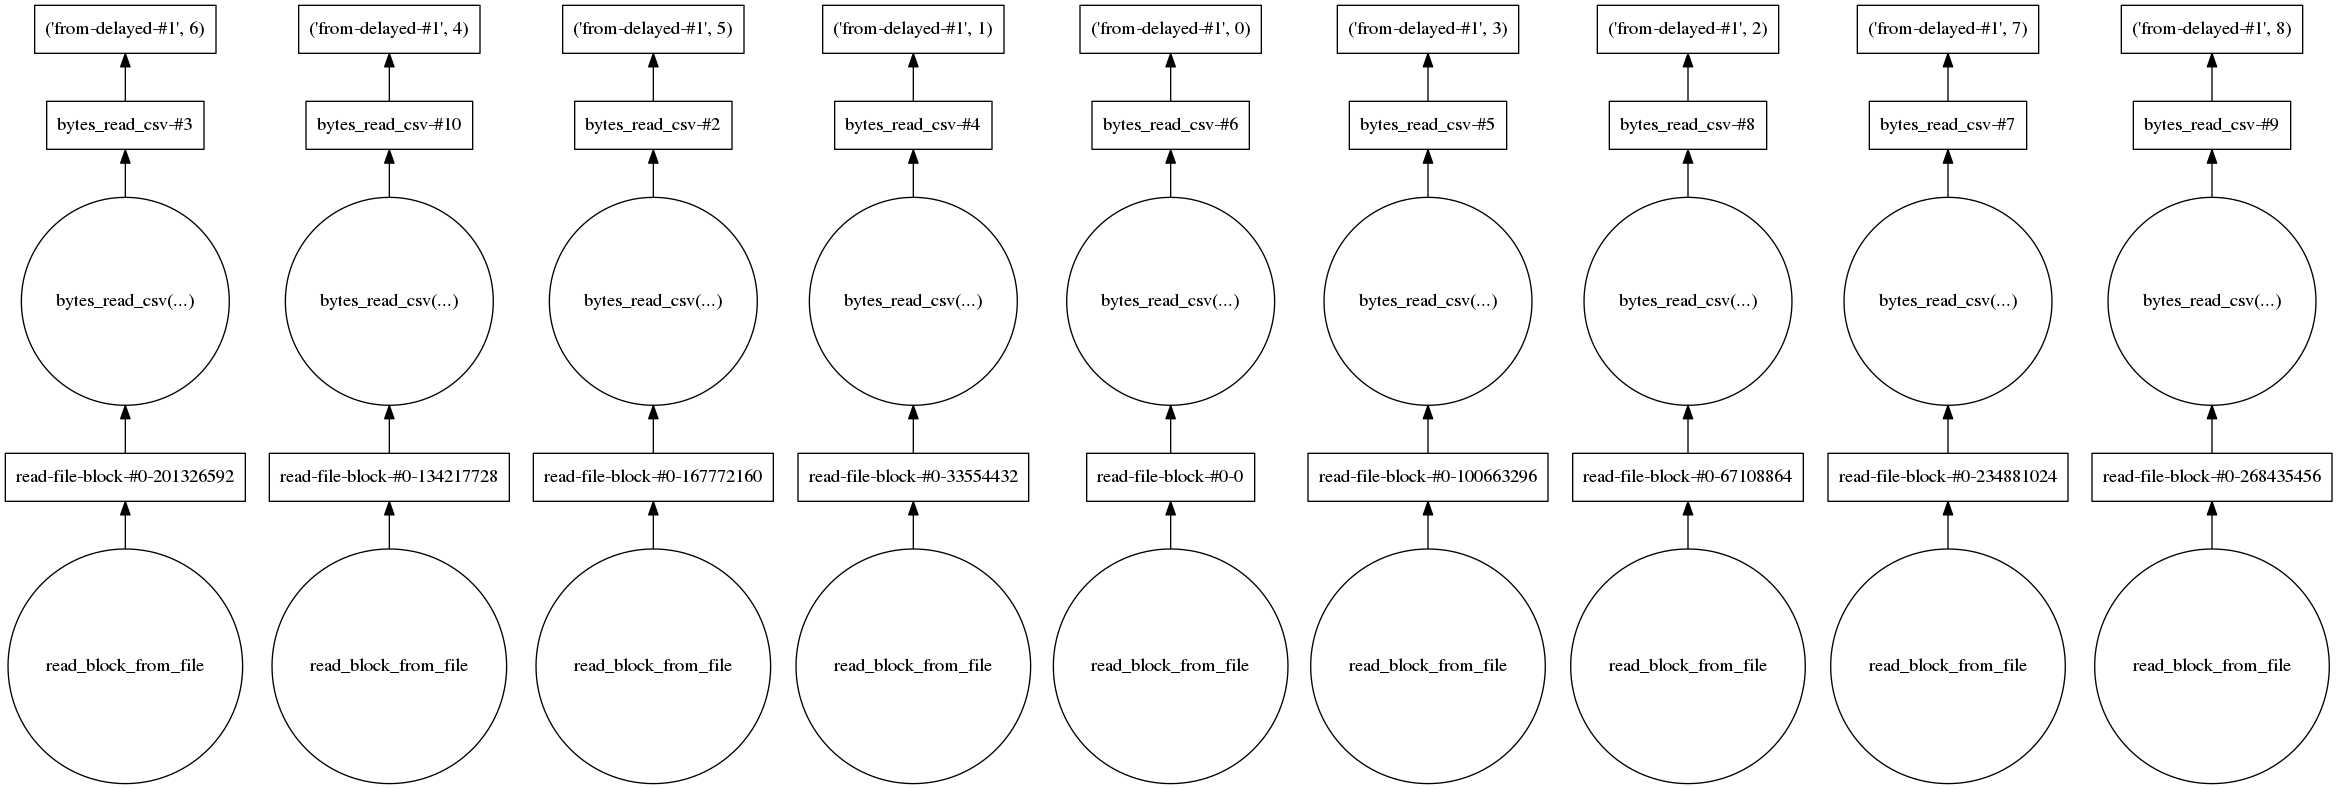

In [5]:
test.visualize()

We can see that for the *test* file what it did was to split the dataframe in 9 chunks. When any operation over this dataframe is performed, this will executed in parallel.

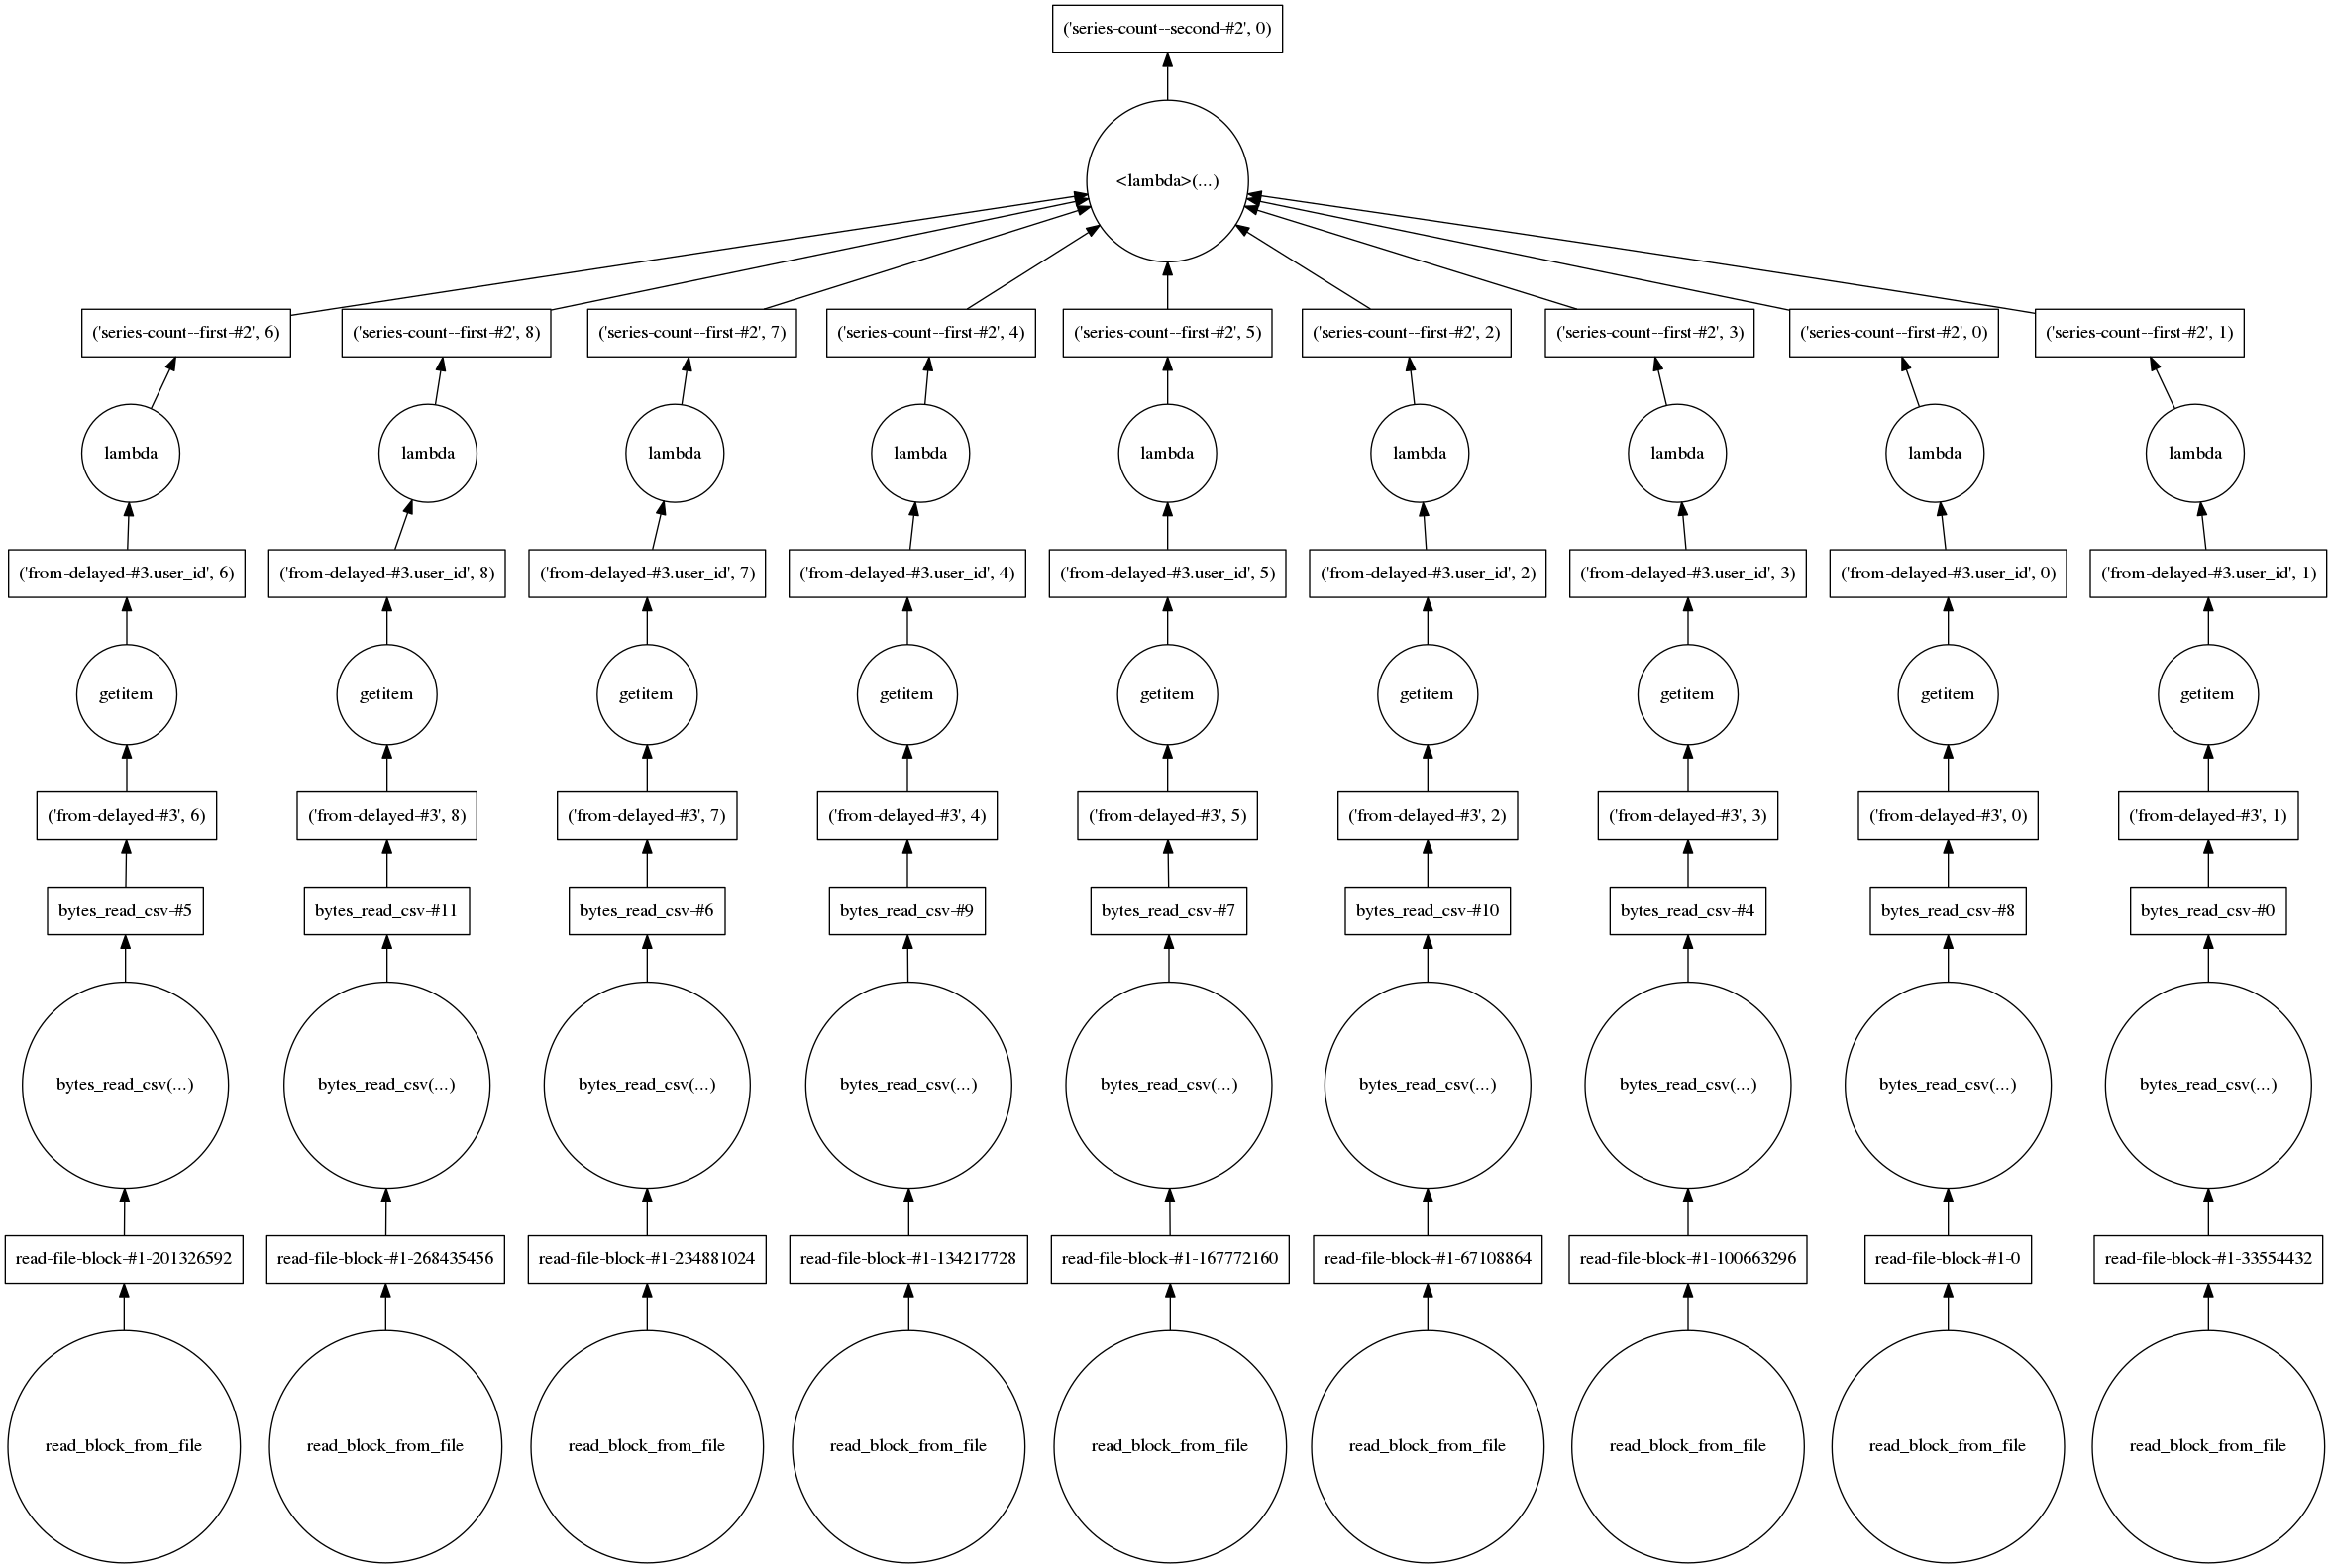

In [6]:
test.user_id.count().visualize()

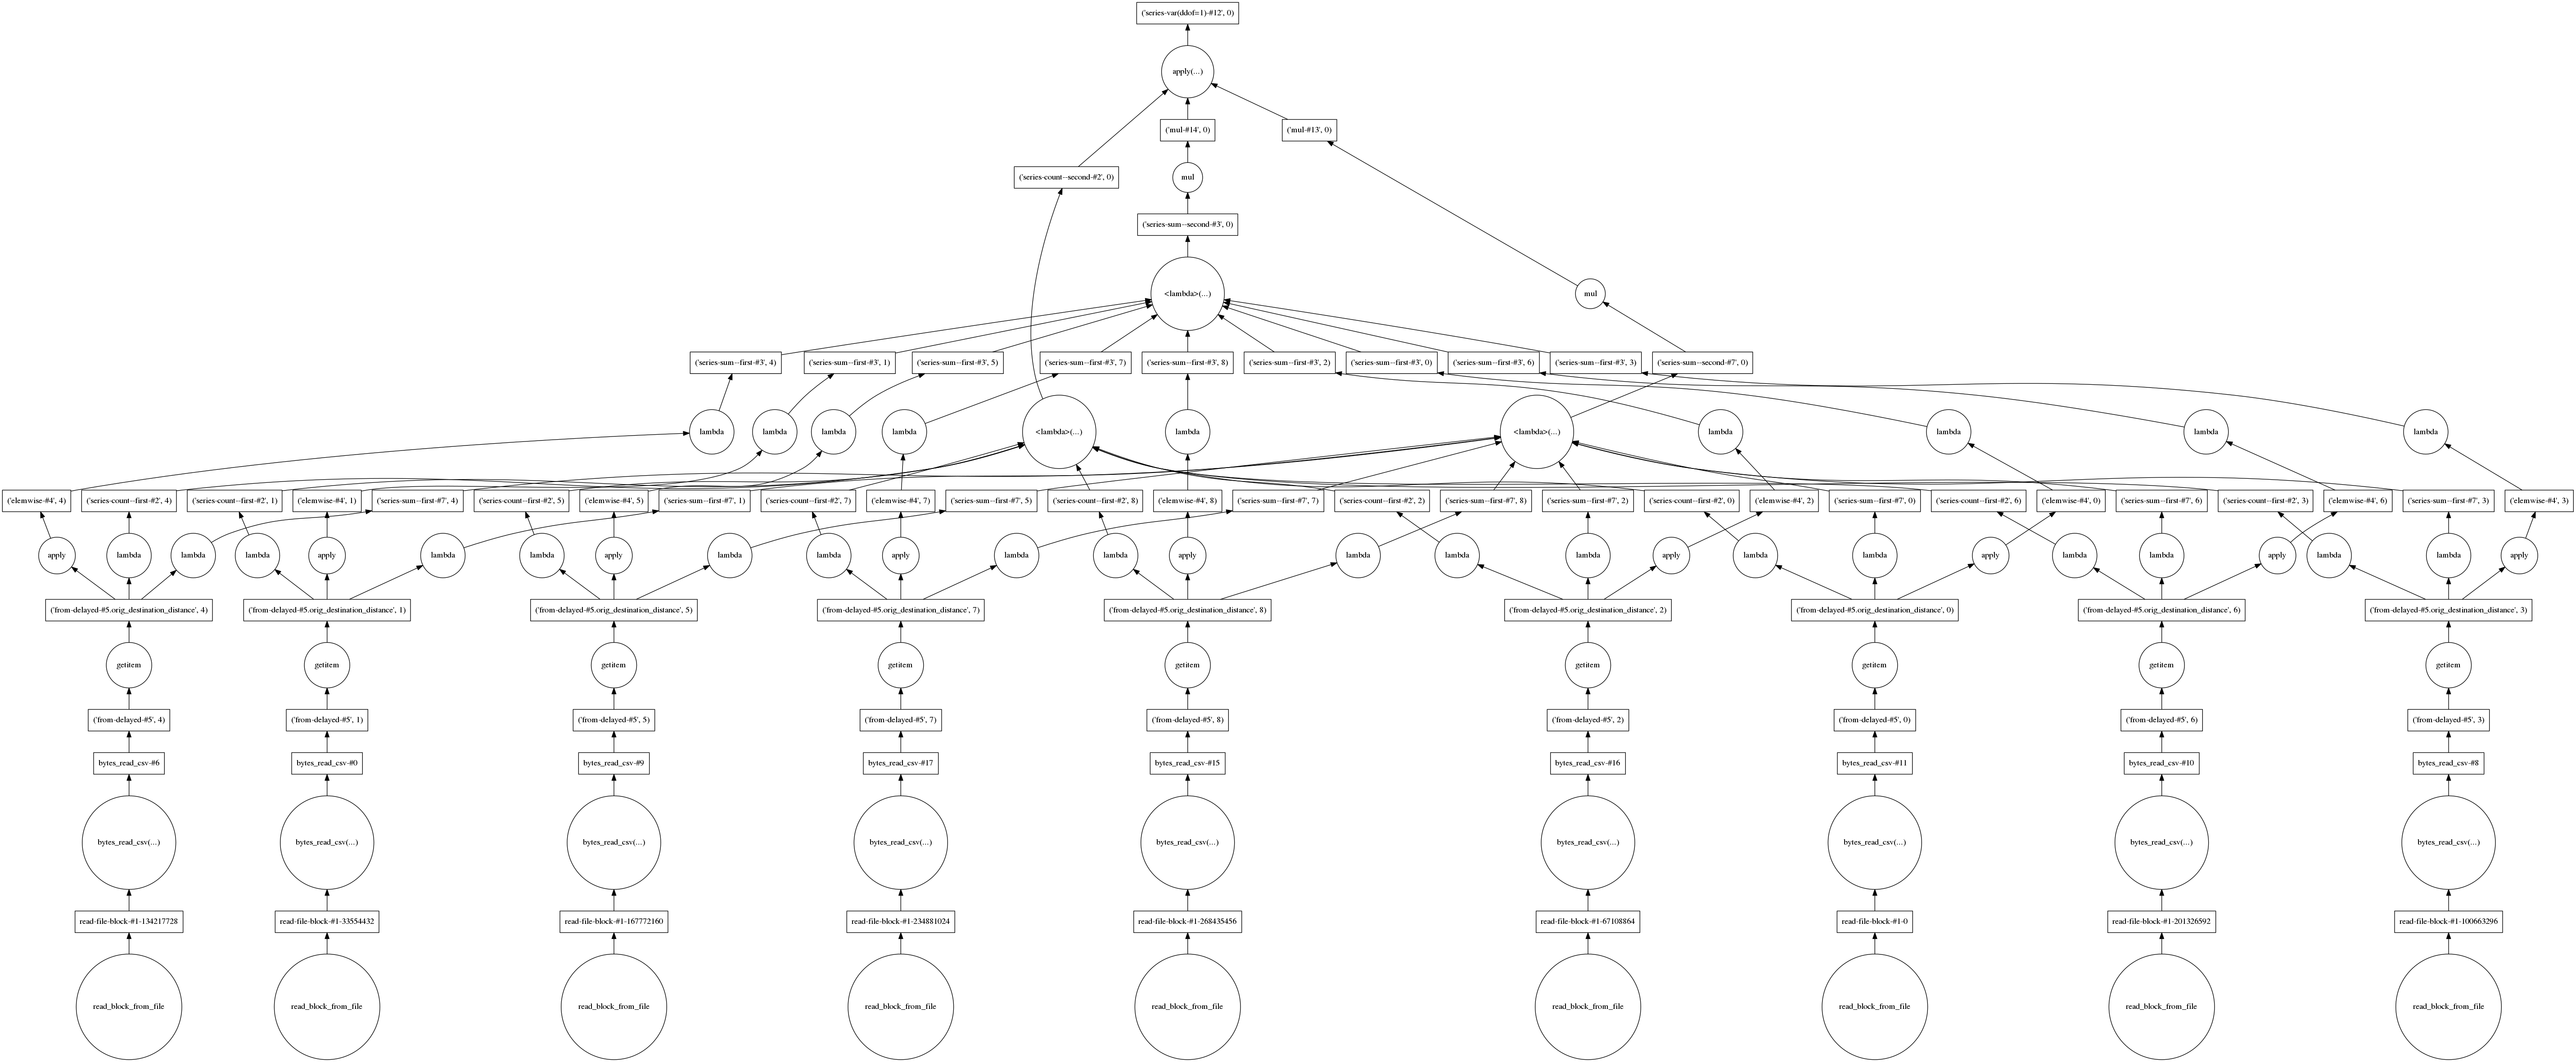

In [7]:
test.orig_destination_distance.var().visualize()

# Some quick look at the data:

In [6]:
print(len(train))

[########################################] | 100% Completed |  1min 20.1s
37670293


In [7]:
train.head()

[########################################] | 100% Completed |  1.9s


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0.0,3.0,2.0,50.0,628.0,1.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1.0,1.0,2.0,50.0,628.0,1.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0.0,1.0,2.0,50.0,628.0,1.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0.0,1.0,2.0,50.0,1457.0,80.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0.0,1.0,2.0,50.0,1457.0,21.0


In [8]:
train.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                          float64
cnt                                 float64
hotel_continent                     float64
hotel_country                       float64
hotel_market                    

In [9]:
# Categorize some vars:
train.srch_adults_cnt = train.srch_adults_cnt.astype('category')
train.srch_children_cnt = train.srch_children_cnt.astype('category')
train.is_mobile = train.is_mobile.astype('category')

# Basic operations

In [34]:
# Slicing and dicing
train[(train.user_location_city==11170) & (train.is_mobile==1)].compute()


[########################################] | 100% Completed |  1min 15.4s


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
60182,2014-11-16 22:13:17,7,1,5,3,11170,NaN,1124996,1,1,...,2,1,8213,1,0.0,1.0,6.0,68.0,275.0,50.0
60183,2014-11-16 22:15:06,7,1,5,3,11170,NaN,1124996,1,1,...,2,1,8213,1,0.0,1.0,6.0,68.0,275.0,42.0
60184,2014-11-16 22:16:21,7,1,5,3,11170,NaN,1124996,1,1,...,2,1,8213,1,0.0,2.0,6.0,68.0,275.0,40.0
60185,2014-11-16 22:18:28,7,1,5,3,11170,NaN,1124996,1,1,...,2,1,8213,1,0.0,1.0,6.0,68.0,275.0,42.0
53222,2014-04-19 01:44:21,7,1,5,3,11170,NaN,160911,1,1,...,0,1,8745,1,0.0,1.0,6.0,204.0,27.0,56.0
53223,2014-04-19 20:52:39,7,1,5,3,11170,NaN,160911,1,1,...,0,1,8745,1,0.0,1.0,6.0,204.0,27.0,56.0
53224,2014-04-19 21:38:08,7,1,5,3,11170,NaN,160911,1,1,...,0,1,8745,1,0.0,1.0,6.0,204.0,27.0,56.0
53225,2014-04-19 21:39:12,7,1,5,3,11170,NaN,160911,1,1,...,0,1,8745,1,0.0,1.0,6.0,204.0,27.0,56.0


In [5]:
train.groupby(['srch_adults_cnt','srch_children_cnt']).user_id.count().compute()

[########################################] | 100% Completed |  1min 20.4s


srch_adults_cnt  srch_children_cnt
0                0                       68634
                 1                        1683
                 2                         585
                 3                          74
                 4                           3
1                0                     7021160
                 1                      776029
                 2                      205890
                 3                       40998
                 4                        5899
                 5                        1661
                 6                        1978
                 7                         472
                 8                         635
                 9                         297
2                0                    19212000
                 1                     2657074
                 2                     2414751
                 3                      340961
                 4                       75071
                 5       

In [22]:
# At what time of the day people make hotel requests?
result = train.groupby(train.date_time.dt.time).user_id.count()
res2=result.compute()

[########################################] | 100% Completed |  4min 38.7s
[########################################] | 100% Completed |  4min 38.7s


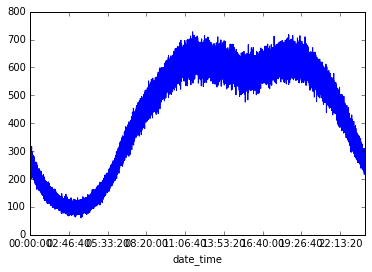

In [23]:
res2.plot()
plt.show()

In [24]:
result = train.groupby(train.date_time.dt.date).user_id.count()
res3=result.compute()

[########################################] | 100% Completed |  6min 53.0s
[########################################] | 100% Completed |  6min 53.1s


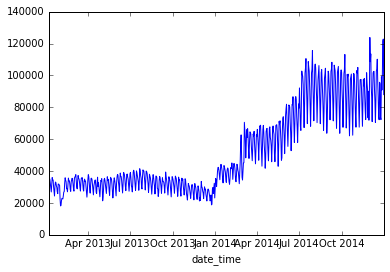

In [27]:
res3.plot()
plt.show()

In [11]:
del res

# Indices
We saw the performance of dask isn't _that_ good. Can we hack around to improve it?
Let's try with indices. This is the variable that defines **partititions** in the dataframes.

In [ ]:
train_ind=train
train_ind.set_index(train_ind.date_time.dt.date)

In [ ]:
result1 = train_ind.groupby(train_ind.date_time.dt.time).user_id.count()
result1.compute()

In [ ]:
result2 = train_ind.groupby(train_ind.date_time.dt.date).user_id.count()
res=result2.compute()

In [ ]:
del result, result2, train_ind

# Merges
Most of the analytic operations involve database-style *join* operations. 
These are implemented in **pandas** with the methods **df.join()** (on index) and **df.merge()** (on column). 

This is sadly a section where dask doesn't shine *yet*. Merges imply some kind of sorting/hash taable between tables, and here you have to sequentilly scan the data on disk to do this, and it's hard.

If you want to perform joins between dataframes that *really* wouldn't fit in memory, on **dask** the way to do it is the following:
- Index both dataframes on the same column: df.set_index('index_col')
- Store them to castra format
- Do the join using the *join* method, not *merge* df1.join(df2)

The problem with *df.merge()* is that shuffles the data first based on the column used for the merge, and then, performs the hash join operation. That isn't *per se* the problem, but when you do it, it usually fills your RAM and leaves you a swapping computer asking for a decent death.

Let's create a small dataframe from the test dataset with only an index and a variable to merge with te big one, and see how it does.

To run the code below, depending on your installation, for this you may need to install package **partd**
- https://github.com/dask/partd

In [31]:
mydf = test[['user_id','user_location_city','is_mobile']].astype(np.int)

In [32]:
mydf = mydf.assign(my_column = (mydf.user_location_city==11170) & (mydf.is_mobile==0))
mydf = mydf.drop(['user_location_city','is_mobile'], axis=1)


In [33]:
mydf.dtypes

user_id      int64
my_column     bool
dtype: object

In [10]:
print(len(mydf))
mydf.head()

[########################################] | 100% Completed |  7.7s
[########################################] | 100% Completed |  7.7s
2528243
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s


,user_id,my_column
0,1,False
1,1,False
2,20,False
3,28,False
4,50,False


### This served to show you some small *gotchas* in the dask.dataframe API: 
- the beloved settitem syntax doesn't work (yet)
- many inplace operations aren't implemented (yet)
- df.shape is not implemented in dask

The reasons for this is that many of these operations require scans of the data that in *lazy* environment like  **dask** it doesn't make sense. 

Let's prepare the datasets for merging

In [12]:
c1=train.set_index('user_id').to_castra(get=dask.multiprocessing.get)
c2=mydf.set_index('user_id').to_castra(get=dask.multiprocessing.get)

[########################################] | 100% Completed |  1min 15.8s
[########################################] | 100% Completed |  1min 15.9s
[########################################] | 100% Completed |  2min 19.4s
[########################################] | 100% Completed |  2min 19.5s
[########################################] | 100% Completed |  3min  7.3s
[########################################] | 100% Completed |  3min  7.4s
[########################################] | 100% Completed |  9.2s
[########################################] | 100% Completed |  9.3s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s


In [13]:
train2 = dd.from_castra(c1)
mydf2 = dd.from_castra(c2)

In [17]:
train2.join(mydf2, how='inner').to_csv('data/merge.csv')

[########################################] | 100% Completed |  1hr  2min 14.4s
[########################################] | 100% Completed |  1hr  2min 14.5s


# Caching
**dask** provides an experimental freature called *opportunistic caching*, that intelligently stores intermediate results for faster access later.
Bear in mind that this feature is *experimental*, dask may underestimate the size of an object in memory, and when loaded, you may enjoy some swapping fun.

The approach used is distinct from the *Least Recently Used (LRU)* approach used in **Spark**.
The philosophy is more about keeping cached what you'll be needing in analytic computations, i.e.:
- Expensive to recompute (in seconds)
- Cheap to store (in bytes)
- Frequently used
- Recenty used

If you want to know more: 
- https://en.wikipedia.org/wiki/Cache_algorithms
- https://dask.pydata.org/en/latest/caching.html
- http://matthewrocklin.com/blog/work/2015/08/03/Caching

To use the re
- https://github.com/blaze/cachey

In [18]:
# Let's perform some ops on the same variable
max_dis=train.orig_destination_distance.max().compute()
min_dis=train.orig_destination_distance.min().compute()
mean_dis=train.orig_destination_distance.mean().compute()
print(min_dis, max_dis, mean_dis)

[########################################] | 100% Completed |  1min 30.0s
[########################################] | 100% Completed |  1min 30.0s
[########################################] | 100% Completed |  1min 23.3s
[########################################] | 100% Completed |  1min 23.4s
[########################################] | 100% Completed |  2min  6.2s
[########################################] | 100% Completed |  2min  6.3s
0.0056 12407.9022 1970.09002672


In [19]:
# Let's cache 
from dask.cache import Cache
cache = Cache(2e9)
cache.register()

In [20]:
# Repeat the operation
max_dis=train.orig_destination_distance.max().compute()
min_dis=train.orig_destination_distance.min().compute()
mean_dis=train.orig_destination_distance.mean().compute()
print(max_dis, min_dis, mean_dis)

[########################################] | 100% Completed |  1min 36.9s
[########################################] | 100% Completed |  1min 37.0s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
12407.9022 0.0056 1970.09002672


In [21]:
cache.unregister()

# Storing data
dask provides convenient methods to store data on common formats, such as *csv* and *hdf*.
Besides, it supports its own format called *castra*. It's two main characteristics:
- It's **chunked**: Data is splitted in order to apply methods on parallel.
- It's **columnar**: when you load a csv, to retrieve a column of this file you have to process the whole file and split lines. With a *columnar* format, you can just load the column you're interested. Most analytic operations just require some of the columns of a datasets, not all of them, so processing them is a waste of time.

Running this example you see that writing to *hdf* is ridiculously faster, but this happens because the first time of the write, it had to scan the files, and the second it didn't.
This happens even though caching is *not* activated in dask. This may be because caching ocurring at OS level.

In [4]:
train.to_csv('data/dask_output.csv')

[########################################] | 100% Completed | 23min 37.0s


In [7]:
train.to_hdf('data/dask_output.hdf5', key='x')

[########################################] | 100% Completed |  6min 23.3s


# Dask Arrays
Probably the most successful part of the project but maybe with least application on Kernel/LR in itself.
It's the on-disk counterpart of **Numpy** (not the whole API, just the most common functions)

In [22]:
import dask.array as da

In [48]:
def random_array(array_name='random.hdf5', size=1000000000):
    import numpy as np
    np.random.seed(0)
    if os.path.exists(array_name):
        return None
        
    print("Store random array in %s" % array_name)
    import h5py

    with h5py.File(os.path.join('data',array_name)) as f:
        dset = f.create_dataset('/x', shape=(size,), dtype='f4')
        for i in range(0, size, 1000000):
            dset[i: i + 1000000] = np.random.exponential(size=1000000)

In [47]:
# Let's create 2 arrays of 1 billion (1e9) elements.
# Don't try this in memory
random_array('random1.hdf5', size=int(2e9))
random_array('random2.hdf5', size=int(2e9))

Store random array in random2.hdf5


In [3]:
# Let's load this into dask arrays.
import h5py
files = [h5py.File('data/random%s.hdf5' % (i+1))['/x'] for i in range(2)]

In [4]:
files

[<HDF5 dataset "x": shape (1000000000,), type "<f4">,
 <HDF5 dataset "x": shape (1000000000,), type "<f4">]

In [5]:
import dask.array as da
from dask.diagnostics import ProgressBar
ProgressBar().register()
arrays = [da.from_array(file,chunks=(10000000, 10000000)) for file in files]

In [25]:
dot=arrays[0].dot(arrays[1])
dot.compute()

[########################################] | 100% Completed |  2min 31.4s


1000059832.0

### What's the memory usage for these two arrays?

In [49]:
print('Array sizes: %s MB ' % ((arrays[0].nbytes+arrays[1].nbytes)/1024))

Array sizes: 7812500.0 MB 


### Neither of these fitted in your laptop.
You just went big data, yay!

### Outputting files
**dask** provides methods to export objects s
Previous operation was ok because the output only produced one number. If you want to export files greater than memory, **dask** struggles a bit.

In [8]:
# What about the outer product?
outer=arrays[0]*arrays[1]

In [10]:
import bcolz
out = bcolz.zeros(shape=outer.shape, rootdir='output.bcolz')

In [11]:
# Store array
da.store(outer, out)  # doctest: +SKIP

[########################################] | 100% Completed |  3min 41.4s


In [24]:
outer[10000:120000].compute()

[########################################] | 100% Completed |  0.2s


array([  0.02259074,   1.22242928,   0.46698231, ...,   6.49351358,
        12.0568552 ,   1.98702204], dtype=float32)

## Gotcha of dask arrays:
- Columns of a dask dataframe can't be easily transformed to a dask array. Possible workaround: https://stackoverflow.com/questions/37444943/dask-array-from-dataframe

## Summary
**dask** is a very promising library for parallel analytic computations.

#### Pros
- You don't need to reinvent the wheel for simple calculations, splitting and iterating over dataframes, writing repetitive map / reduce functions.
- Allows you to use all the cores of your machine.
- Feel like using **pandas** (almost)
- Extremely easy to set up, compared to **spark**

#### Cons
- Still in development, API changes possible
- Not very well documented. Official documentation is OK, but most of the time for practical examples you'll end up in Matthew Rocklin's blog (which is very good): http://matthewrocklin.com/blog/
- Feels a bit broken some times
- It's slow. This is not entirely its fault, remember you're *reading from disk* and magnetic disks normally won't go faster than 80Mb/s at *top* speeds, which aren't reached at analytic pipelines.
- For *very* simple operations like taking a subset of columns, or sorting, removing duplicates, etc. **dask** is overkill. These tasks can be achieved using command line programs from **GNU Coreutils + sed + awk**, and also *way* faster.